In [ ]:
## For data visualization and manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline


## For machine learning
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

The heart disease dataset is a dataset that contains information about patients and their attributes related to heart disease.

Heart disease datasets typically include a variety of patient attributes such as age, gender, blood pressure, cholesterol levels, presence of certain symptoms, and diagnostic test results. These datasets are commonly used for studying and analyzing risk factors associated with heart disease, developing predictive models, and exploring potential relationships between different variables and the occurrence of heart disease.

Analyzing heart disease datasets can help researchers, healthcare professionals, and data scientists gain insights into the factors that contribute to heart disease and develop strategies for prevention, early detection, and effective treatment. It is worth noting that specific datasets may have different features, formats, and objectives, so it's important to refer to the dataset documentation or description for detailed information on the variables and their meanings in a particular heart disease dataset.

In [82]:
# Reading the dataset
hd = pd.read_csv("./heart_disease.csv")

# Displaying the first few rows of the dataset
hd.head()

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0    Male   39   postgraduate              0        0.00    0.00   
1  Female   46  primaryschool              0        0.00    0.00   
2    Male   48     uneducated              1       20.00    0.00   
3  Female   61       graduate              1       30.00    0.00   
4  Female   46       graduate              1       23.00    0.00   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  \
0              no             0         0   195.00 106.00  70.00 26.97   
1              no             0         0   250.00 121.00  81.00 28.73   
2              no             0         0   245.00 127.50  80.00 25.34   
3              no             1         0   225.00 150.00  95.00 28.58   
4              no             0         0   285.00 130.00  84.00 23.10   

   heartRate  glucose Heart_ stroke  
0      80.00    77.00            No  
1      95.00    76.00            No  
2      75.00    70.00            No  
3      65.00   103.00           yes  
4      85.00    85.00            No

In [83]:
#show the dimension of the dataset
hd.shape

(4238, 16)

In [84]:
#check for missing values in the dataset
hd.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [34]:
#filling each column's missing values with its respective mode
columns_to_fill = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

for column in columns_to_fill:
    hd[column].fillna(value=hd[column].mode()[0], inplace=True)

In [35]:
hd.head()

Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0    Male   39   postgraduate              0        0.00    0.00   
1  Female   46  primaryschool              0        0.00    0.00   
2    Male   48     uneducated              1       20.00    0.00   
3  Female   61       graduate              1       30.00    0.00   
4  Female   46       graduate              1       23.00    0.00   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP   BMI  \
0              no             0         0   195.00 106.00  70.00 26.97   
1              no             0         0   250.00 121.00  81.00 28.73   
2              no             0         0   245.00 127.50  80.00 25.34   
3              no             1         0   225.00 150.00  95.00 28.58   
4              no             0         0   285.00 130.00  84.00 23.10   

   heartRate  glucose Heart_ stroke  
0      80.00    77.00            No  
1      95.00    76.00            No  
2      75.00    70.00            No  
3      65.00   103.00           yes  
4      85.00    85.00            No

In [36]:
#check for any missing values after filling the columns with the respective mode
hd.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [37]:
#show the datatypes in the dataset
hd.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

In [42]:
categorical_data = ['Gender', 'education', 'prevalentStroke', 'Heart_ stroke']
hd[categorical_data].head()

Gender      education prevalentStroke Heart_ stroke
0    Male   postgraduate              no            No
1  Female  primaryschool              no            No
2    Male     uneducated              no            No
3  Female       graduate              no           yes
4  Female       graduate              no            No

In [45]:
le = LabelEncoder()
encoded = le.fit_transform(hd['Gender'])
print(encoded)

[1 0 1 ... 0 0 0]


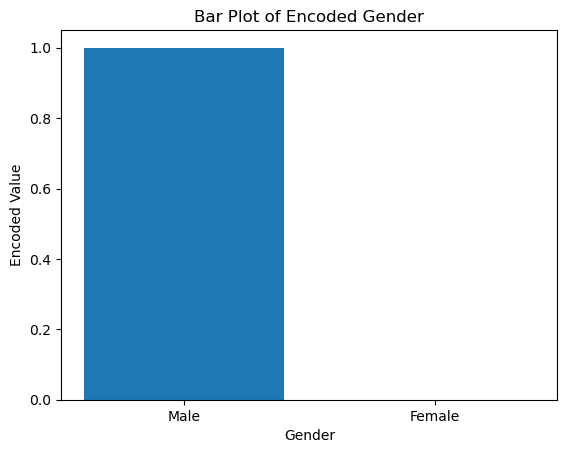

In [85]:
# Encoding the 'Gender' column using LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(hd['Gender'])

# Creating a bar plot
plt.bar(hd['Gender'], encoded)

# Adding labels and title to the plot
plt.xlabel('Gender')
plt.ylabel('Encoded Value')
plt.title('Bar Plot of Encoded Gender')

# Displaying the plot
plt.show()

In [47]:
for col in categorical_data:
    encoded = le.fit_transform(hd[col])
    hd.drop(col, axis=1, inplace=True)
    hd[col] = encoded
    
hd.head()

age  currentSmoker  cigsPerDay  BPMeds  prevalentHyp  diabetes  totChol  \
0   39              0        0.00    0.00             0         0   195.00   
1   46              0        0.00    0.00             0         0   250.00   
2   48              1       20.00    0.00             0         0   245.00   
3   61              1       30.00    0.00             1         0   225.00   
4   46              1       23.00    0.00             0         0   285.00   

   sysBP  diaBP   BMI  heartRate  glucose  Gender  education  prevalentStroke  \
0 106.00  70.00 26.97      80.00    77.00       1          1                0   
1 121.00  81.00 28.73      95.00    76.00       0          2                0   
2 127.50  80.00 25.34      75.00    70.00       1          3                0   
3 150.00  95.00 28.58      65.00   103.00       0          0                0   
4 130.00  84.00 23.10      85.00    85.00       0          0                0   

   Heart_ stroke  
0              0  
1              0  
2              0  
3              1  
4              0

<Figure size 640x480 with 0 Axes>

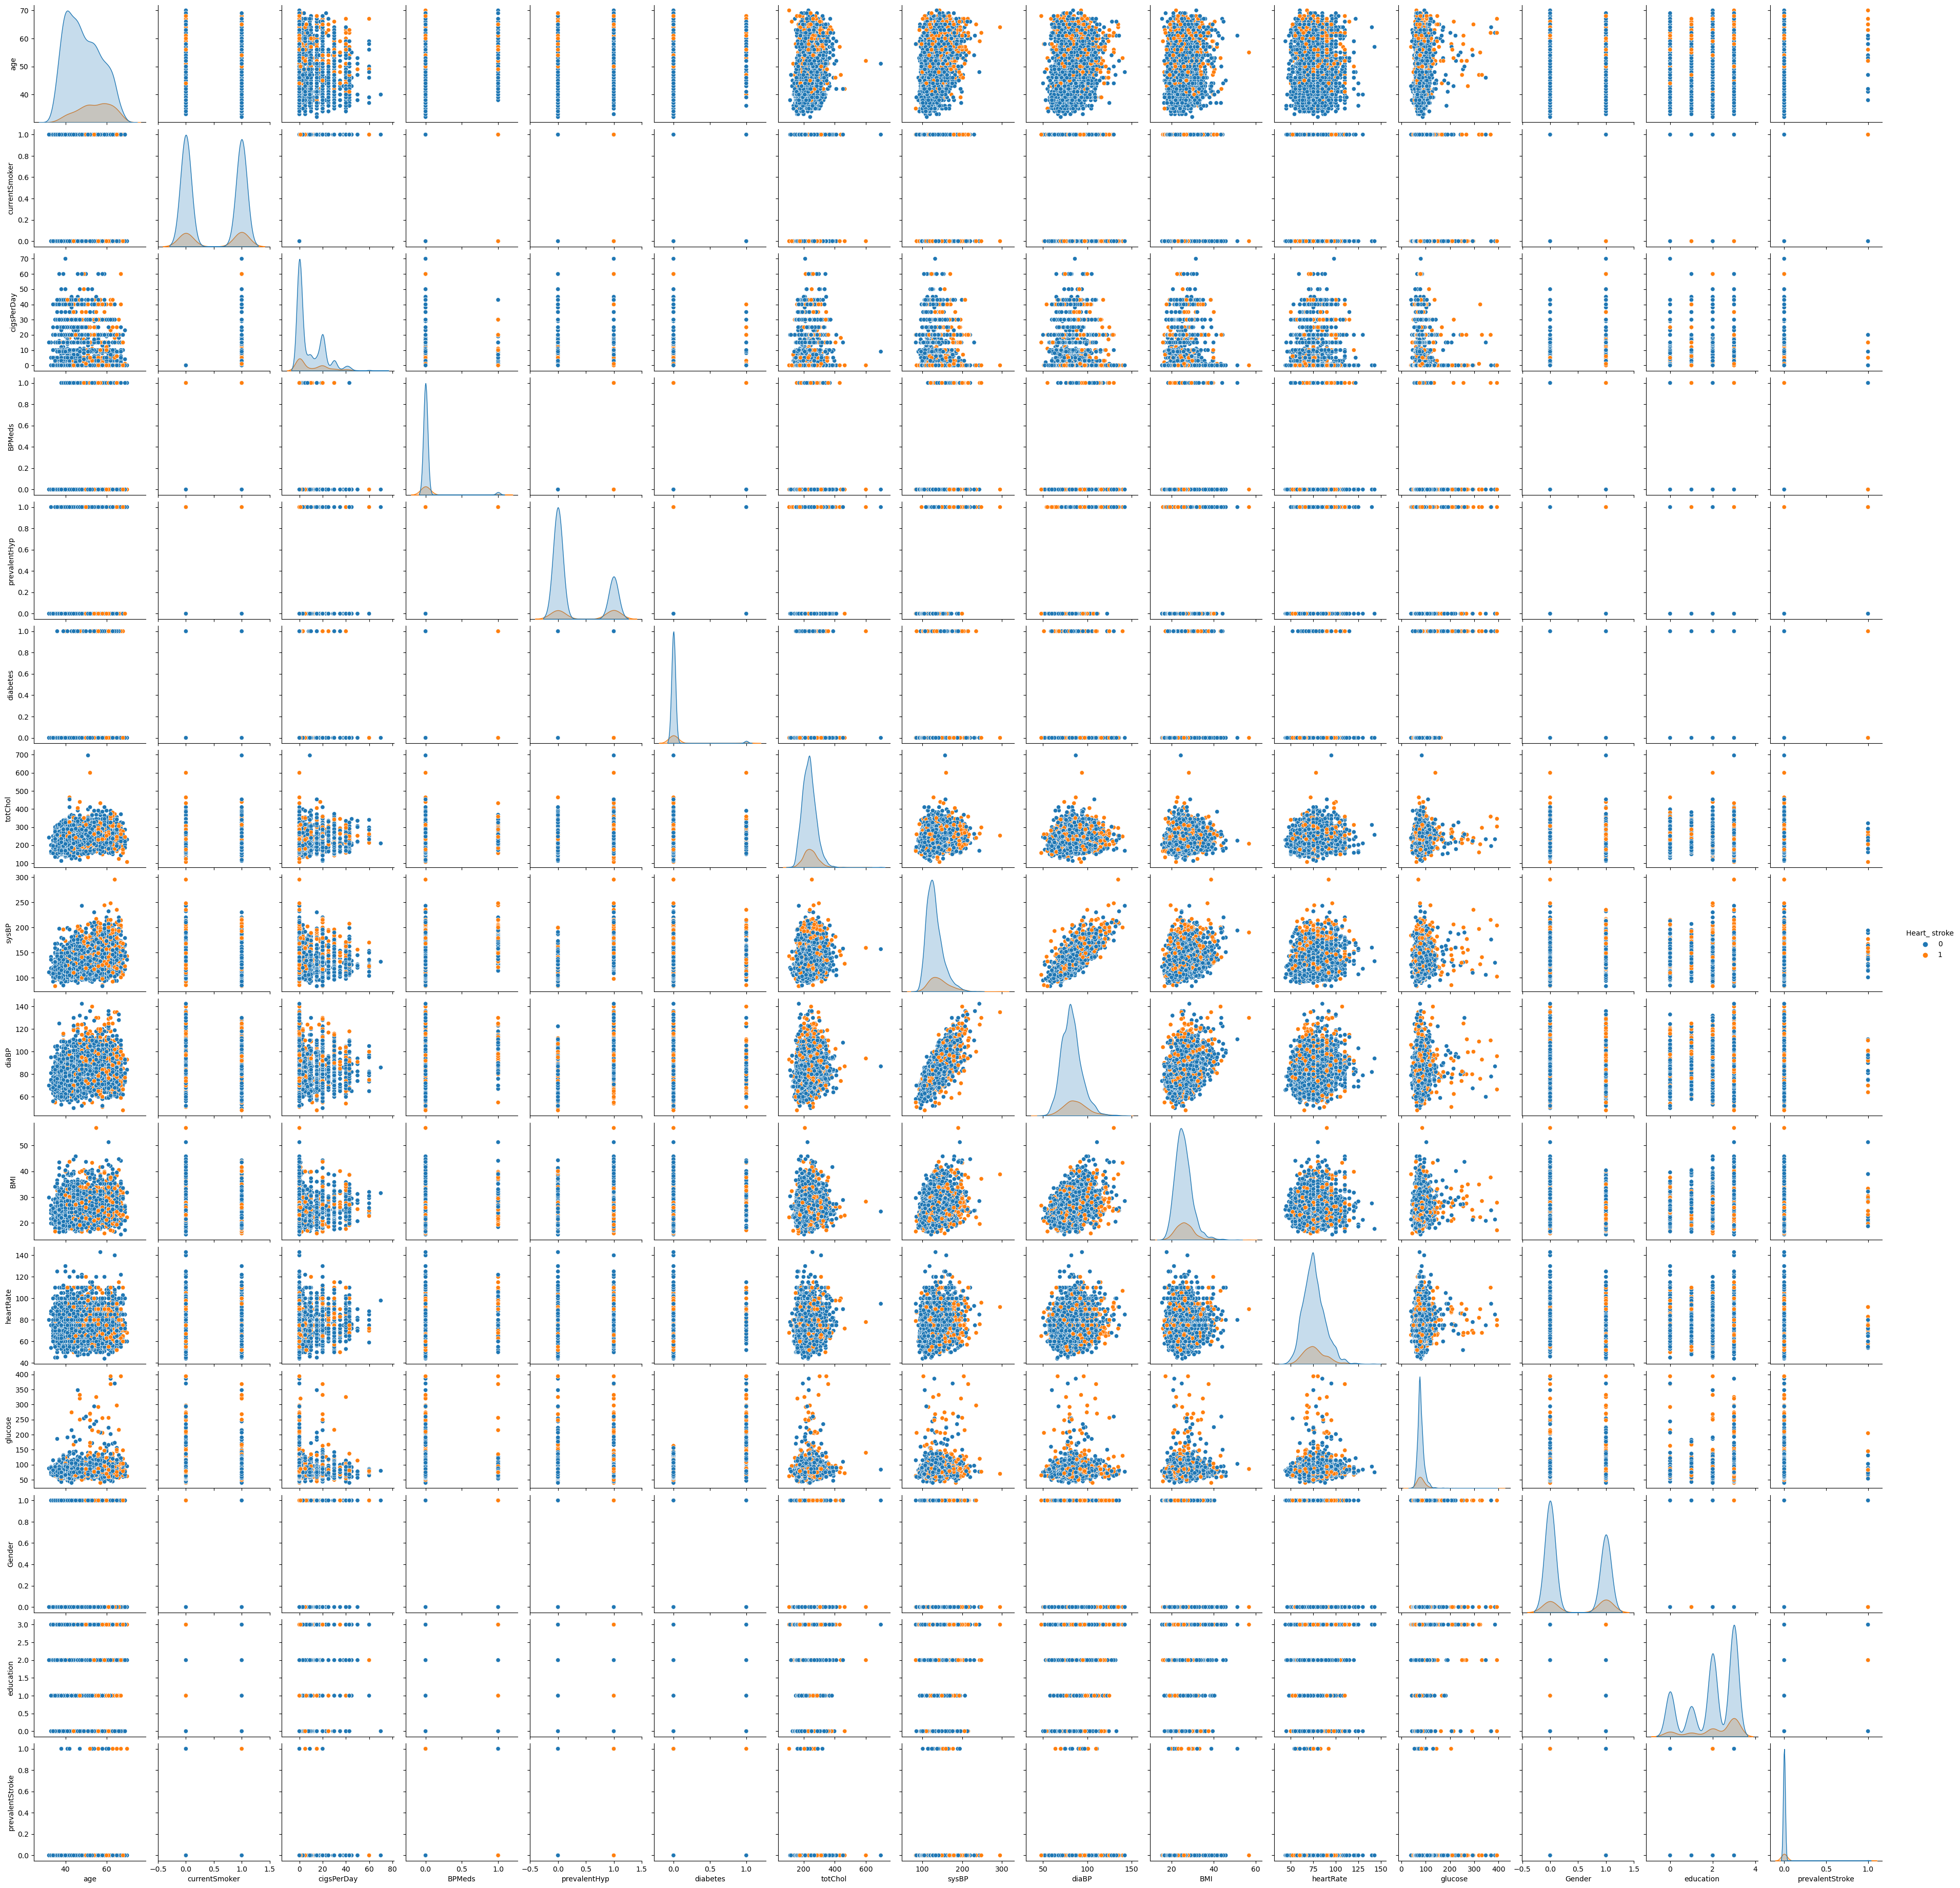

In [53]:
color_palette = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"] # New color palette
sns.set_palette(color_palette)
fig = plt.figure()
sns.pairplot(hd, hue='Heart_ stroke', palette=["#1F77B4", "#FF7F0E"])# Use the first two colors of the new color palette
fig.savefig('pairplot.png')
plt.show()

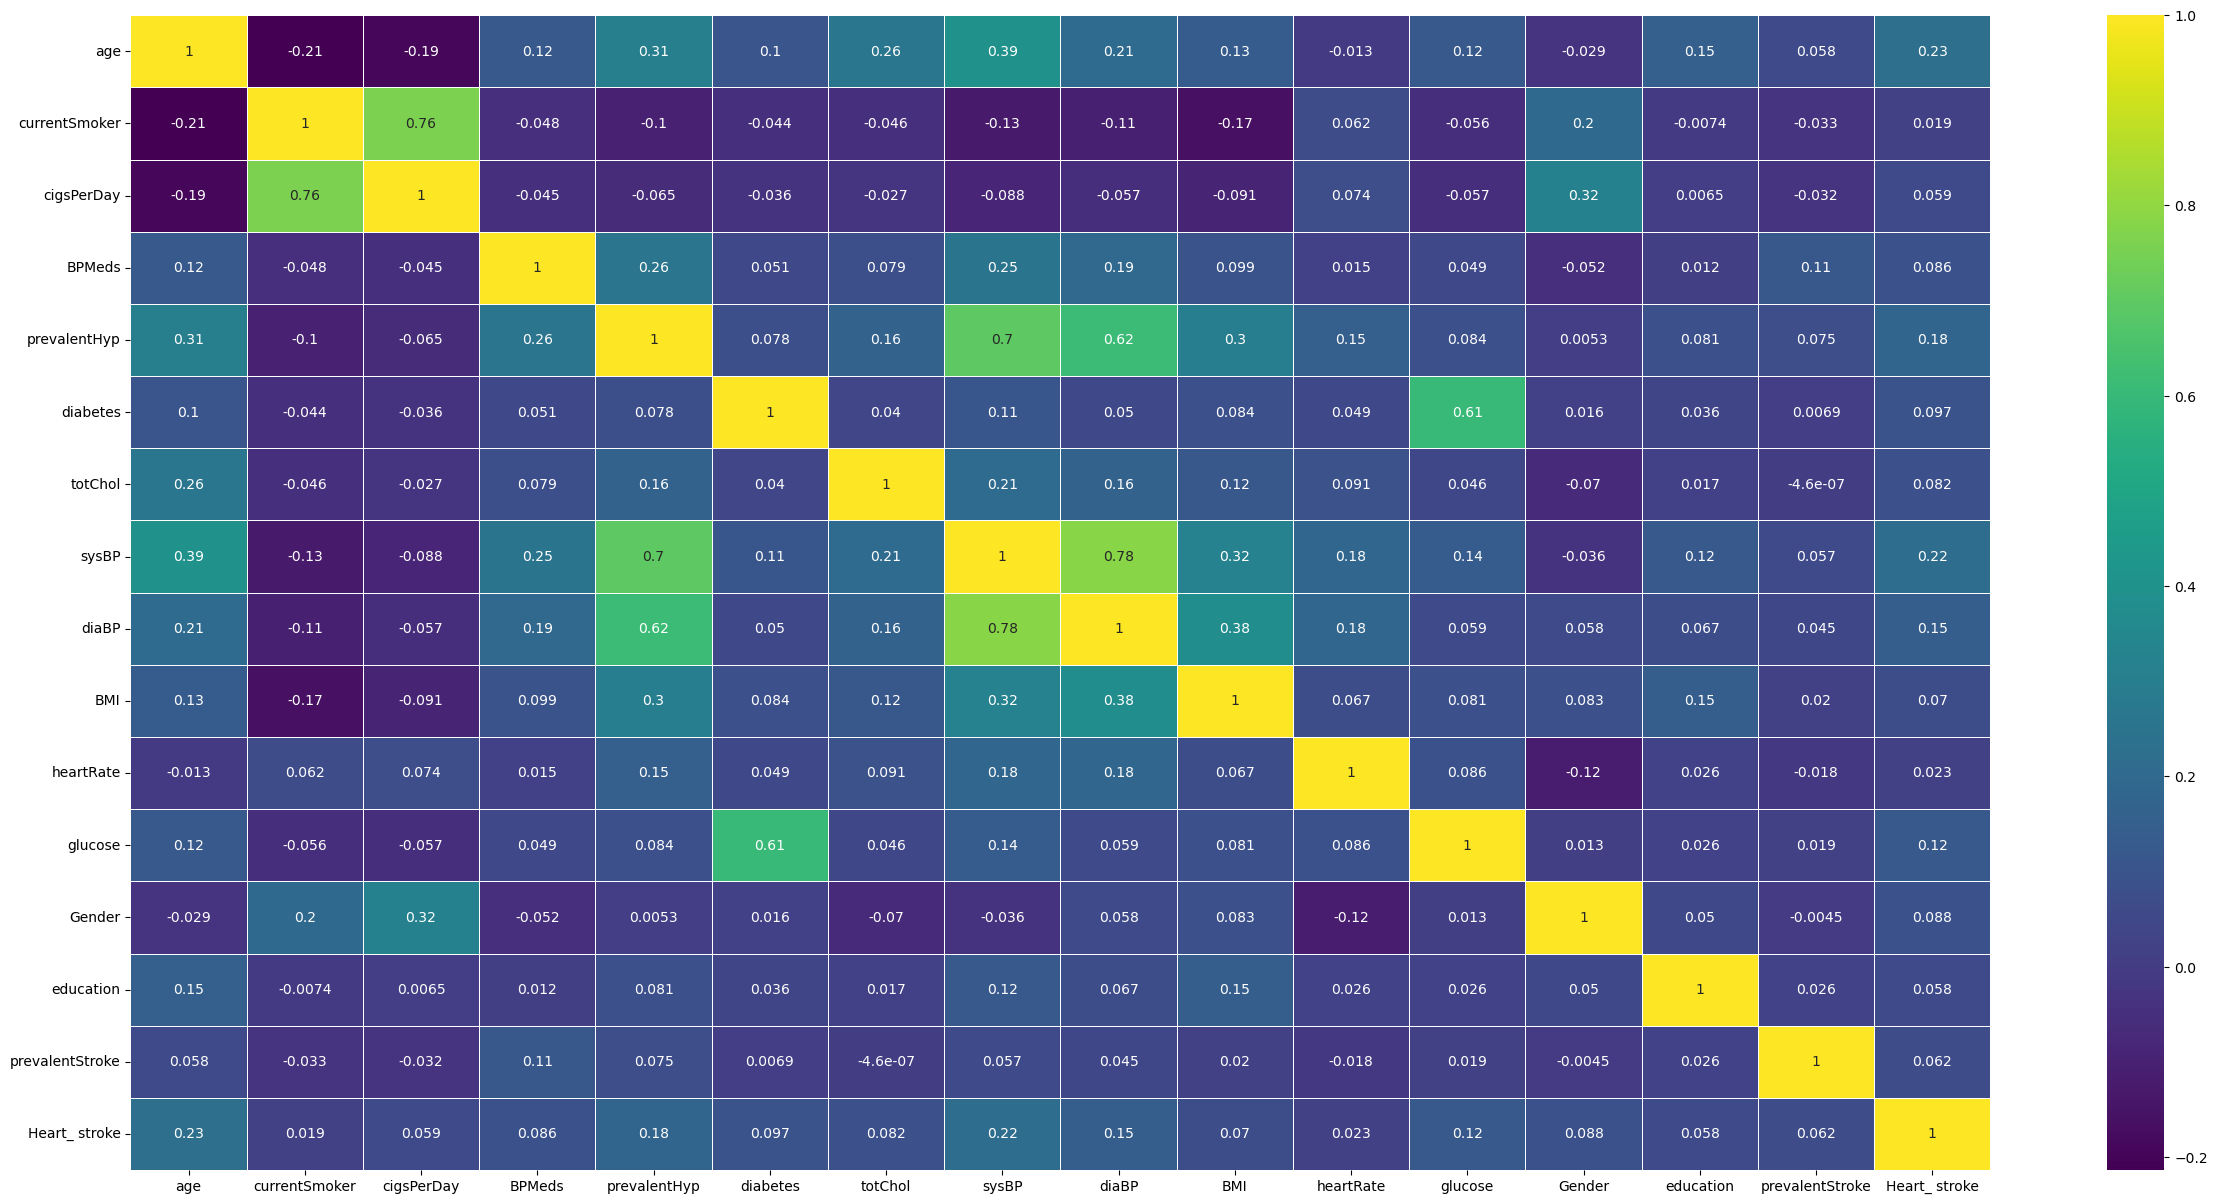

In [54]:
plt.figure(figsize=(30, 15))
sns.heatmap(hd.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.show()

In [55]:
X = hd.drop(columns=['Heart_ stroke'])
Y = hd['Heart_ stroke']

X.head

<bound method NDFrame.head of       age  currentSmoker  cigsPerDay  BPMeds  prevalentHyp  diabetes  totChol  \
0      39              0        0.00    0.00             0         0   195.00   
1      46              0        0.00    0.00             0         0   250.00   
2      48              1       20.00    0.00             0         0   245.00   
3      61              1       30.00    0.00             1         0   225.00   
4      46              1       23.00    0.00             0         0   285.00   
...   ...            ...         ...     ...           ...       ...      ...   
4233   50              1        1.00    0.00             1         0   313.00   
4234   51              1       43.00    0.00             0         0   207.00   
4235   48              1       20.00    0.00             0         0   248.00   
4236   44              1       15.00    0.00             0         0   210.00   
4237   52              0        0.00    0.00             0         0   269.00  

In [56]:
Y.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: Heart_ stroke, Length: 4238, dtype: int64>

In [57]:
# Split the data into training and testing sets using an 80-20 ratio, stratifying on Y and setting a random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Print the shapes of the original data (X), the training set (X_train), and the testing set (X_test)
print("Original data shape:", X.shape)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Original data shape: (4238, 15)
Training data shape: (3390, 15)
Testing data shape: (848, 15)


In [61]:
# Instantiate the RandomForestClassifier with max_depth set to 10 and random_state set to 2
# max_depth limits the maximum depth of the tree
# random_state controls the randomness of the model, allowing for reproducibility
rf = RandomForestClassifier(max_depth=10, random_state=2)

# Fit the RandomForestClassifier on the training data
# X_train contains the training features and Y_train contains the corresponding labels
rf.fit(X_train, Y_train)

# After fitting the model, you can use it to make predictions on new data.
# For example, you can predict on the test data and calculate evaluation metrics:
# Y_pred = rf.predict(X_test)
# precision = precision_score(Y_test, Y_pred)
# accuracy = accuracy_score(Y_test, Y_pred)
# recall = recall_score(Y_test, Y_pred)
# confusion = confusion_matrix(Y_test, Y_pred)


RandomForestClassifier(max_depth=10, random_state=2)

In [62]:
# Use the Random Forest model (rf) to predict the training data (X_train)
train_pred = rf.predict(X_train)

# Calculate and print the accuracy score of the model on the training data
print("Train Accuracy Score: ", accuracy_score(Y_train, train_pred))

# Calculate and print the precision score of the model on the training data (macro average)
print("Train Precision Score: ", precision_score(Y_train, train_pred, average='macro'))

# Calculate and print the recall score of the model on the training data (macro average)
print("Train Recall Score: ", recall_score(Y_train, train_pred, average='macro'))

Train Accuracy Score:  0.8852507374631269
Train Precision Score:  0.9404105392156863
Train Recall Score:  0.6223300970873786


In [63]:
# Use the RandomForest model 'rf' to predict the test data
test_pred = rf.predict(X_test)

# Calculate and print the accuracy score of the predictions on the test data
print("Test Accuracy Score: ", accuracy_score(Y_test, test_pred))

# Calculate and print the precision score of the predictions on the test data with 'macro' averaging
print("Test Precision Score: ", precision_score(Y_test, test_pred, average='macro'))

# Calculate and print the recall score of the predictions on the test data with 'macro' averaging
print("Test Recall Score: ", recall_score(Y_test, test_pred, average='macro'))

Test Accuracy Score:  0.847877358490566
Test Precision Score:  0.6747630331753555
Test Recall Score:  0.5063611174003515


TN=717, FP=2, FN=127, TP=2


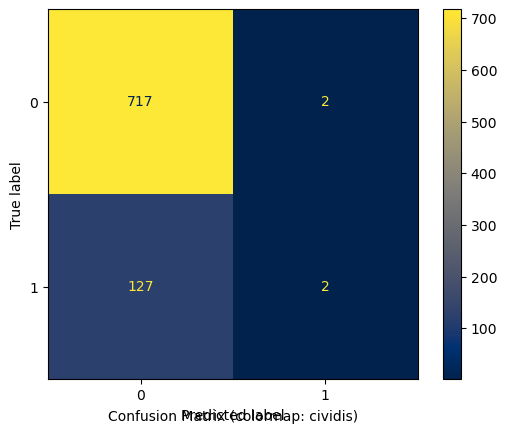

In [80]:
# Compute the confusion matrix
cm = confusion_matrix(Y_test, test_pred)

# Unpack the confusion matrix values
TN, FP, FN, TP = cm.ravel()

# Print the values of TN, FP, FN, TP
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))

# Create a ConfusionMatrixDisplay instance with the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix using a different colormap (e.g., 'cividis')
disp.plot(cmap='cividis')  # Change the colormap to 'cividis'

# Add a comment explaining the colormap change
plt.text(0.5, -0.1, "Confusion Matrix (colormap: cividis)", horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [66]:
# Calculate accuracy: the proportion of true results (both true positives and true negatives) among the total number of cases examined
calculated_accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision: the proportion of true positive results among the total number of positive results predicted by the classifier
calculated_precision = (TP) / (TP + FP)

# Calculate recall (sensitivity): the proportion of true positive results among the total number of true positive and false negative results
calculated_recall = (TP) / (TP + FN)

# Print calculated accuracy, precision, and recall
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.847877358490566
Calculated precision =  0.5
Calculated recall =  0.015503875968992248


In [68]:
# Dropping the 'Gender' column from the training dataset and creating a new dataset 'X_train_stroke'
X_train_stroke = X_train.drop(columns=['Gender'])

# Dropping the 'Gender' column from the testing dataset and creating a new dataset 'X_test_stroke'
X_test_stroke = X_test.drop(columns=['Gender'])

In [69]:
# Create a RandomForestClassifier object with a maximum depth of 10 and a fixed random state of 2 for reproducibility
rf_stroke = RandomForestClassifier(max_depth=10, random_state=2)

# Fit the RandomForestClassifier model to the training data (X_train_stroke and Y_train)
rf_stroke.fit(X_train_stroke, Y_train)

RandomForestClassifier(max_depth=10, random_state=2)

In [70]:
# Predict the stroke labels using the Random Forest model (rf_stroke) on the training data (X_train_stroke)
train_predict_stroke = rf_stroke.predict(X_train_stroke)

# Calculate and print the accuracy of the model on the training data
print("Accuracy on train data: ", metrics.accuracy_score(Y_train, train_predict_stroke))

# Calculate and print the precision of the model on the training data
print("Precision using train data:", metrics.precision_score(Y_train, train_predict_stroke))

# Calculate and print the recall of the model on the training data
print("Recall using train data:", metrics.recall_score(Y_train, train_predict_stroke))

Accuracy on train data:  0.8861356932153392
Precision using train data: 1.0
Recall using train data: 0.2504854368932039


In [71]:
# Predict the stroke outcome for the test dataset using the random forest classifier
test_predict_stroke = rf_stroke.predict(X_test_stroke)

# Calculate the accuracy of the model on the test dataset
accuracy = metrics.accuracy_score(Y_test, test_predict_stroke)
print("Accuracy on test data: ", accuracy)

# Calculate the precision of the model on the test dataset
precision = metrics.precision_score(Y_test, test_predict_stroke)
print("Precision using test data:", precision)

# Calculate the recall of the model on the test dataset
recall = metrics.recall_score(Y_test, test_predict_stroke)
print("Recall on testing data: ", recall)

Accuracy on test data:  0.847877358490566
Precision using test data: 0.5
Recall on testing data:  0.015503875968992248


In [72]:
# Evaluate the model on the train set
# Calculate the accuracy score for the train set
train_accuracy = metrics.accuracy_score(Y_train, train_predict_stroke)
# Calculate the precision score for the train set
train_precision = metrics.precision_score(Y_train, train_predict_stroke)
# Calculate the recall score for the train set
train_recall = metrics.recall_score(Y_train, train_predict_stroke)

# Evaluate the model on the test set
# Calculate the accuracy score for the test set
test_accuracy = metrics.accuracy_score(Y_test, test_predict_stroke)
# Calculate the precision score for the test set
test_precision = metrics.precision_score(Y_test, test_predict_stroke)
# Calculate the recall score for the test set
test_recall = metrics.recall_score(Y_test, test_predict_stroke)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
# Print the train accuracy score, rounded to two decimal places
print(f"Train Accuracy: {train_accuracy:.2f}")
# Print the train precision score, rounded to two decimal places
print(f"Train Precision: {train_precision:.2f}")
# Print the train recall score, rounded to two decimal places
print(f"Train Recall: {train_recall:.2f}")
# Print the test accuracy score, rounded to two decimal places
print(f"Test Accuracy: {test_accuracy:.2f}")
# Print the test precision score, rounded to two decimal places
print(f"Test Precision: {test_precision:.2f}")
# Print the test recall score, rounded to two decimal places
print(f"Test Recall: {test_recall:.2f}")


Random Forest Model Evaluation:
Train Accuracy: 0.89
Train Precision: 1.00
Train Recall: 0.25
Test Accuracy: 0.85
Test Precision: 0.50
Test Recall: 0.02


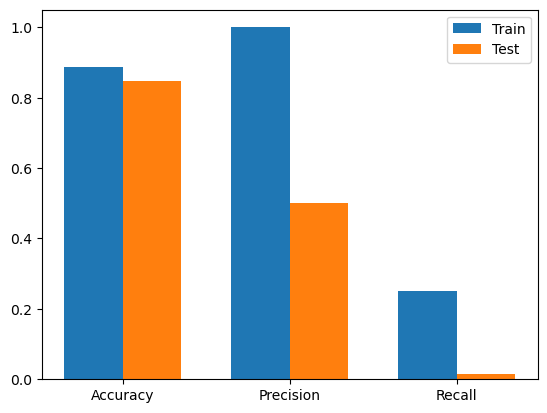

In [73]:
# Evaluate the model on the train set
train_accuracy = metrics.accuracy_score(Y_train, train_predict_stroke)
train_precision = metrics.precision_score(Y_train, train_predict_stroke)
train_recall = metrics.recall_score(Y_train, train_predict_stroke)

# Evaluate the model on the test set
test_accuracy = metrics.accuracy_score(Y_test, test_predict_stroke)
test_precision = metrics.precision_score(Y_test, test_predict_stroke)
test_recall = metrics.recall_score(Y_test, test_predict_stroke)

# Define evaluation metrics and corresponding scores
metrics_list = ['Accuracy', 'Precision', 'Recall']
train_scores = [train_accuracy, train_precision, train_recall]
test_scores = [test_accuracy, test_precision, test_recall]

# Prepare bar plot settings
x = list(range(len(metrics_list)))  # Convert range to list
width = 0.35  # Width of the bars

# Create a bar plot
fig, ax = plt.subplots()

# Add bars for train scores
train_bars = ax.bar([i - width / 2 for i in x], train_scores, width, label='Train')

# Add bars for test scores
test_bars = ax.bar([i + width / 2 for i in x], test_scores, width, label='Test')

# Configure plot settings
ax.set_xticks(x)
ax.set_xticklabels(metrics_list)
ax.legend()

# Display the plot
plt.show()

In [74]:
PROTECTED = "Gender"  # Column name for the protected attribute
MEN = 1.0  # Male
WOMEN = 0.0  # Female

# Find indices of men and women in X_test based on the protected attribute
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]

# Print the indices and the number of men and women
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

[  0   2   3   9  10  11  14  17  18  22  25  29  30  31  39  44  45  47
  51  52  57  58  59  61  63  66  68  69  74  76  79  80  83  86  89  93
  94  95  97  98 101 103 106 111 112 114 116 118 122 127 131 132 133 135
 137 139 146 148 149 150 154 155 156 158 160 162 163 164 165 169 170 173
 174 176 179 182 184 185 189 190 191 192 193 194 195 196 198 199 200 202
 203 205 207 208 213 214 217 219 220 222 225 226 231 232 239 240 245 247
 248 255 261 263 264 265 266 268 269 271 273 274 276 280 282 286 287 289
 290 292 294 296 299 300 301 302 304 305 307 308 312 326 331 332 339 340
 341 344 346 347 348 349 356 357 359 362 363 364 365 366 367 368 369 371
 373 377 379 381 382 383 384 387 390 396 400 403 406 407 408 410 411 412
 413 416 417 418 423 426 429 432 434 436 438 439 441 442 443 445 446 447
 449 451 453 454 455 456 457 459 462 464 467 468 469 470 474 475 476 478
 480 482 484 486 489 490 492 493 494 496 499 500 502 503 509 510 511 512
 514 516 518 519 522 530 532 536 537 538 539 540 54

In [75]:
# Select values from Y_test corresponding to indices of men
Y_test_m = [Y_test.values[i] for i in men_indices]

# Select values from Y_test corresponding to indices of women
Y_test_f = [Y_test.values[i] for i in women_indices]

# Print the values of Y_test_m (men)
print(Y_test_m)

# Print the values of Y_test_f (women)
print(Y_test_f)

[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [76]:
# Select predicted stroke values for men
test_predict_M_indices = [test_predict_stroke[i] for i in men_indices]

# Select predicted stroke values for women
test_predict_F_indices = [test_predict_stroke[i] for i in women_indices]

# Print the predicted stroke values for men
print("Predicted stroke values for men:")
print(test_predict_M_indices)

# Print the predicted stroke values for women
print("Predicted stroke values for women:")
print(test_predict_F_indices)

Predicted stroke values for men:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Accuracy (male): 0.8010335917312662
Accuracy (female): 0.8872017353579176
Positive rate (male): 0.5
Positive rate (female): 0.5
Recall (male): 0.012987012987012988
Recall (female): 0.019230769230769232


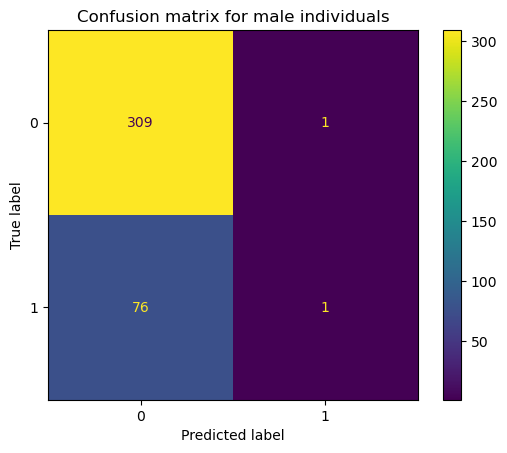

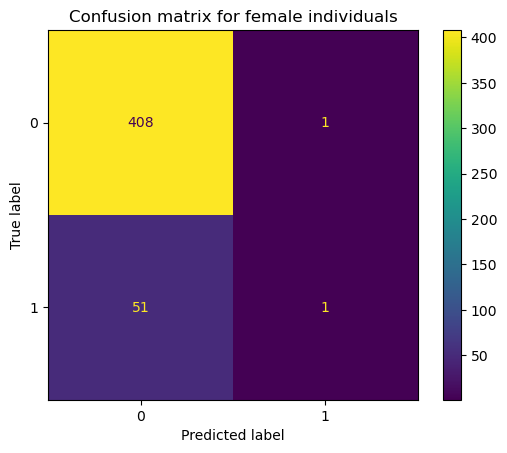

In [77]:
# Compute confusion matrix and classification report for male individuals
cm_m = confusion_matrix(Y_test_m, test_predict_M_indices)
cr_m = classification_report(Y_test_m, test_predict_M_indices)

# Compute confusion matrix and classification report for female individuals
cm_f = confusion_matrix(Y_test_f, test_predict_F_indices)
cr_f = classification_report(Y_test_f, test_predict_F_indices)

# Compute accuracy, positive rate (precision), and recall for each group
accuracy_m = cm_m.diagonal().sum() / cm_m.sum()
accuracy_f = cm_f.diagonal().sum() / cm_f.sum()
precision_m = cm_m[1, 1] / cm_m[:, 1].sum()
precision_f = cm_f[1, 1] / cm_f[:, 1].sum()
recall_m = cm_m[1, 1] / cm_m[1, :].sum()
recall_f = cm_f[1, 1] / cm_f[1, :].sum()

# Print the evaluation metrics
print("Accuracy (male):", accuracy_m)
print("Accuracy (female):", accuracy_f)
print("Positive rate (male):", precision_m)
print("Positive rate (female):", precision_f)
print("Recall (male):", recall_m)
print("Recall (female):", recall_f)

# Plot confusion matrix for male individuals
cm_display_m = metrics.ConfusionMatrixDisplay(cm_m, display_labels=[0, 1])
cm_display_m.plot()
plt.title("Confusion matrix for male individuals")
plt.show()

# Plot confusion matrix for female individuals
cm_display_f = metrics.ConfusionMatrixDisplay(cm_f, display_labels=[0, 1])
cm_display_f.plot()
plt.title("Confusion matrix for female individuals")
plt.show()

In [78]:
# Compute confusion matrix and classification report for female individuals
cm_f = confusion_matrix(Y_test_f, test_predict_F_indices)  # Compute confusion matrix for females
cr_f = classification_report(Y_test_f, test_predict_F_indices)  # Compute classification report for females
print("Confusion matrix (female):")
print(cm_f)  # Print the confusion matrix for females
print("Classification report (female):")
print(cr_f)  # Print the classification report for females

# Compute accuracy, positive rate (precision), and recall for each group
accuracy_m = cm_m.diagonal().sum() / cm_m.sum()  # Compute accuracy for males
accuracy_f = cm_f.diagonal().sum() / cm_f.sum()  # Compute accuracy for females
precision_m = cm_m[1, 1] / cm_m[:, 1].sum()  # Compute positive rate (precision) for males
precision_f = cm_f[1, 1] / cm_f[:, 1].sum()  # Compute positive rate (precision) for females
recall_m = cm_m[1, 1] / cm_m[1, :].sum()  # Compute recall for males
recall_f = cm_f[1, 1] / cm_f[1, :].sum()  # Compute recall for females

print("Accuracy (male):", accuracy_m)  # Print accuracy for males
print("Accuracy (female):", accuracy_f)  # Print accuracy for females
print("Positive rate (male):", precision_m)  # Print positive rate (precision) for males
print("Positive rate (female):", precision_f)  # Print positive rate (precision) for females
print("Recall (male):", recall_m)  # Print recall for males
print("Recall (female):", recall_f)  # Print recall for females

Confusion matrix (female):
[[408   1]
 [ 51   1]]
Classification report (female):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       409
           1       0.50      0.02      0.04        52

    accuracy                           0.89       461
   macro avg       0.69      0.51      0.49       461
weighted avg       0.85      0.89      0.84       461

Accuracy (male): 0.8010335917312662
Accuracy (female): 0.8872017353579176
Positive rate (male): 0.5
Positive rate (female): 0.5
Recall (male): 0.012987012987012988
Recall (female): 0.019230769230769232


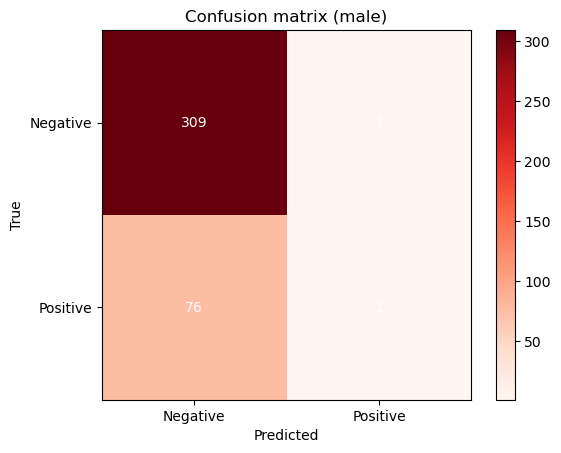

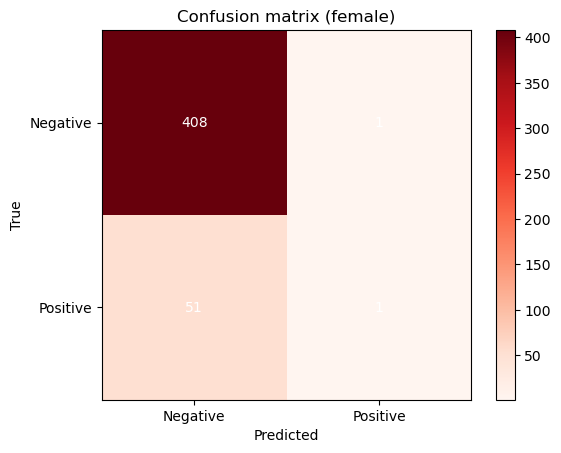

In [79]:
# Define classes and labels
classes = np.unique(Y_test)
labels = ['Negative', 'Positive']

# Define color map
cmap = plt.cm.Reds  # Changing the color map to Reds

# Plot confusion matrix for male group
fig, ax = plt.subplots()
im = ax.imshow(cm_m, interpolation='nearest', cmap=cmap)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion matrix (male)')

# Add values to confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, str(cm_m[i, j]), ha='center', va='center', color='white')

plt.colorbar(im)
plt.show()

# Plot confusion matrix for female group
fig, ax = plt.subplots()
im = ax.imshow(cm_f, interpolation='nearest', cmap=cmap)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion matrix (female)')

# Add values to confusion matrix
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, str(cm_f[i, j]), ha='center', va='center', color='white')

plt.colorbar(im)
plt.show()

# Add a comment explaining the purpose of the code
# This code generates confusion matrices for male and female groups and visualizes them using color maps to represent the data. The matrices are labeled and the values are added to each cell for better interpretation.